## Efekty graficzne cz.2

In [1]:
from moviepy.editor import *
from moviepy.video.io.bindings import mplfig_to_npimage
import numpy as np
import matplotlib.pyplot as plt
import random


#### Tworzenie animacji pewnej funkcji z użyciem biblioteki numpy i zapis do pliku.gif

t:   4%|██▋                                                                   | 3/80 [00:00<00:04, 17.06it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


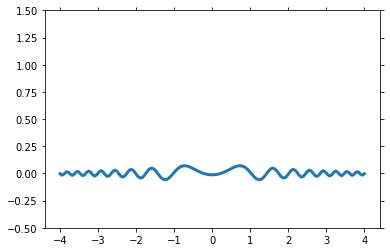

In [6]:

x = np.linspace(-4, 4, 150)
duration = 4 #czas trwania w sekundach

fig, ax = plt.subplots()
def make_frame(t): #jako argument jest brany czas, co pozwala w każdej jednostce czasu przechwytywac nowo wygenerowany wykres
    ax.clear()
    ax.plot(x, np.sinc(x**2+t), lw=3) #stworzenie funkcji
    ax.set_ylim(-0.5, 1.5)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
animation.ipython_display(fps=20, loop=True, autoplay=True)

In [31]:
animation.write_gif("output/active_wave.gif", fps=20)

t:   2%|█▊                                                                    | 2/80 [00:00<00:05, 15.04it/s, now=None]

MoviePy - Building file output/active_wave.gif with imageio.


In [7]:
animation.close()

#### Rysowanie losowych wektorów do muzyki

In [ ]:
# załączenie modułów służących do odczytu i edycji muzyki
import librosa 



                                                                                                                 

t:  99%|██████████████████████████████████████████████████████████████████ | 699/709 [13:35<00:00, 88.86it/s, now=None]

                                                                                                                 

chunk:   4%|██▎                                                            | 28/782 [00:00<00:03, 225.91it/s, now=None]

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


                                                                                                                       

                                                                                                                 

t:  99%|██████████████████████████████████████████████████████████████████ | 699/709 [13:36<00:00, 88.86it/s, now=None]

                                                                                                                 

t:   1%|▍                                                                    | 3/532 [00:00<00:21, 24.08it/s, now=None]

MoviePy - Done.
Moviepy - Writing video __temp__.mp4



                                                                                                                       

                                                                                                                 

t:  99%|██████████████████████████████████████████████████████████████████ | 699/709 [13:40<00:00, 88.86it/s, now=None]

                                                                                                                 

t:  99%|██████████████████████████████████████████████████████████████████ | 699/709 [13:40<00:00, 88.86it/s, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


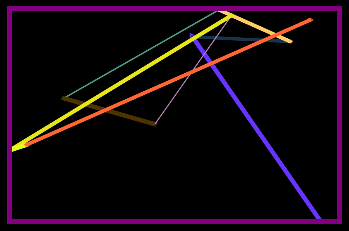

In [75]:
def make_frame(t): #jako argument jest brany czas, co pozwala w każdej jednostce czasu przechwytywac nowo wygenerowany wykres
    global start_point
    global beat_times
    global beat_iterator

#    ax.clear()
#    start_point=[round(random.uniform(xy_range[0],xy_range[1]), 2), round(random.uniform(xy_range[0],xy_range[1]), 2)] 
    end_point=[round(random.uniform(xy_range[0],xy_range[1]), 2), round(random.uniform(xy_range[0],xy_range[1]), 2)]
    dxy = np.subtract(end_point,start_point)
      
    if(beat_iterator < len(beat_times)):
        check_beat = abs(beat_times[beat_iterator]-t)
    else:
        beat_iterator -= 2
        check_beat = 0
        
    
    red = round(random.uniform(0,1), 1)
    green = round(random.uniform(0,1), 1)
    blue = round(random.uniform(0,1), 1) 
    l_width = round(random.uniform(0,4), 2)

    if (round(check_beat,2) <= 0.03): #ustawienie czułości doboru beatu
        beat_iterator+=1
        
        if(beat_iterator%2 == 0):
            max_val = xy_range[1]
            wx1, wy1 = [0,0],[0,max_val]
            wx2, wy2 = [0,max_val],[max_val,max_val]
            wx3, wy3 = [max_val,max_val], [max_val, 0]
            wx4, wy4 = [max_val,0], [0,0]
            ax.plot(wx1, wy1, wx2, wy2, wx3,wy3,wx4,wy4, color = 'purple', lw = 10.0)
        else:
            ax.clear()
            
    ax.arrow(start_point[0], start_point[1], dxy[0], dxy[1],ec=(red, green, blue), lw=l_width)
    
    start_point = end_point
    ax.set_ylim(xy_range[0],xy_range[1])
    ax.set_xlim(xy_range[0],xy_range[1])
    plt.axis('off')
    fig.patch.set_facecolor(('black'))
    times.append(t)

    return mplfig_to_npimage(fig)

fig, ax = plt.subplots() #rysowanie wykresu

xy_range = [0,1000] #zakres rysowania wektorów
times = []
beat_iterator=0

#losowe miejsce startu
start_point=[round(random.uniform(xy_range[0],xy_range[1]), 2), round(random.uniform(xy_range[0],xy_range[1]), 2)] 

# odczyt muzyki w celu poznania rytmu
x, sr = librosa.load('music/gravity_wav.wav') #do biblioteki librosa
music = AudioFileClip("music/gravity_wav.wav") #do moviepy
music_duration = round(music.duration,2)

# wyznaczenie rytmu
# Można to rozwinąć i uzyskiwać lepsze wyniki przy pomocy uczenia maszynowego.

tempo, beat_times = librosa.beat.beat_track(x, sr=sr, units='time')

duration = music_duration #można skrócić
animation = VideoClip(make_frame, duration=duration)
#animation = animation.set_fps(20)
animation = animation.set_audio(music).set_fps(15)

animation.ipython_display(loop=True, autoplay=True, rate=5000)



In [74]:
#zapis do pliku
#animation.write_videofile("output/rave.mp4")

In [51]:
animation.close()
music.close()